In [1]:
import pandas as pd
import numpy as np

import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
fake_d= pd.read_csv(r"C:\Users\HP\Desktop\fake.csv")
true_d= pd.read_csv(r"C:\Users\HP\Desktop\true.csv")

In [3]:
fake_d.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_d.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#printing the stopwrods(word that add no value to the news)
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
 fake_d.shape
    

(23481, 4)

In [8]:
true_d.shape

(21417, 4)

In [9]:
fake_d["label"]=1
true_d["label"]=0

In [10]:
fake_d.shape

(23481, 5)

In [11]:
train_set=pd.concat([fake_d,true_d])

In [12]:
train_set=train_set.sample(frac=1).reset_index(drop=True)

In [13]:
train_set.head()

,title,text,subject,date,label
0,Indonesian forces prepare to storm Papua villa...,JAKARTA (Reuters) - Indonesian security forces...,worldnews,"November 11, 2017",0
1,IRONY ALERT! DC’S DAY WITHOUT WOMEN Literally ...,We hope these women realize they were being us...,Government News,"Mar 8, 2017",1
2,Elizabeth Warren Brilliantly Responds To A**h...,Clearly forgetting that we re in the year 2016...,News,"March 18, 2016",1
3,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,politics,"Mar 8, 2016",1
4,BILL CLINTON LOSES IT With Heckler In Finger-P...,,Government News,"Nov 2, 2016",1


In [14]:
train_set.dtypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

In [15]:
label_distribution=train_set['label'].value_counts()

In [16]:
labels=[f"{label} ({count})" for label, count in zip(label_distribution.index,label_distribution.values)]

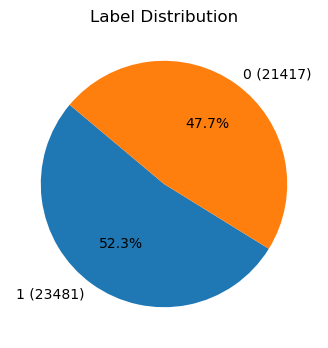

In [17]:
plt.figure(figsize=(4, 4))
plt.pie(label_distribution,labels=labels,autopct='%1.1f%%',startangle=140)
plt.title('Label Distribution')
plt.show()

In [18]:
fake_d.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [19]:
true_d.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [20]:
train_set.head()

,title,text,subject,date,label
0,Indonesian forces prepare to storm Papua villa...,JAKARTA (Reuters) - Indonesian security forces...,worldnews,"November 11, 2017",0
1,IRONY ALERT! DC’S DAY WITHOUT WOMEN Literally ...,We hope these women realize they were being us...,Government News,"Mar 8, 2017",1
2,Elizabeth Warren Brilliantly Responds To A**h...,Clearly forgetting that we re in the year 2016...,News,"March 18, 2016",1
3,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,politics,"Mar 8, 2016",1
4,BILL CLINTON LOSES IT With Heckler In Finger-P...,,Government News,"Nov 2, 2016",1


In [21]:
train_set.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [22]:
# replacing empty string with null strings
 #train_set=train_set.fillna()

In [23]:
# merging the subject and the title
train_set['content']=train_set['subject']+' '+train_set['title']

In [24]:
 print(train_set['content'])

0        worldnews Indonesian forces prepare to storm P...
1        Government News IRONY ALERT! DC’S DAY WITHOUT ...
2        News  Elizabeth Warren Brilliantly Responds To...
3        politics STAND UP AND CHEER! UKIP Party Leader...
4        Government News BILL CLINTON LOSES IT With Hec...
                               ...                        
44893    politics “GYNECOLOGY WITHOUT BORDERS” Group Re...
44894    politicsNews House tax positions begin to emer...
44895    News  Donald Trump Just Humiliated Himself By ...
44896    politicsNews Top court exempts church-affiliat...
44897    News  Matt Damon Just Revealed A HUGE Secret A...
Name: content, Length: 44898, dtype: object


In [25]:
#separating the label and the data
X=train_set.drop(columns='label',axis=1)
Y=train_set['label']


In [26]:
print(X)
print(Y)

                                                   title  \
0      Indonesian forces prepare to storm Papua villa...   
1      IRONY ALERT! DC’S DAY WITHOUT WOMEN Literally ...   
2       Elizabeth Warren Brilliantly Responds To A**h...   
3      STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...   
4      BILL CLINTON LOSES IT With Heckler In Finger-P...   
...                                                  ...   
44893  “GYNECOLOGY WITHOUT BORDERS” Group Releases GU...   
44894  House tax positions begin to emerge ahead of t...   
44895   Donald Trump Just Humiliated Himself By Mista...   
44896  Top court exempts church-affiliated hospitals ...   
44897   Matt Damon Just Revealed A HUGE Secret About ...   

                                                    text          subject  \
0      JAKARTA (Reuters) - Indonesian security forces...        worldnews   
1      We hope these women realize they were being us...  Government News   
2      Clearly forgetting that we re in the year

In [27]:
#stemming is a process of reducing a word to its root word
   #eg: acting,actor,actress ----act is the root word    

In [28]:
 port_stem= PorterStemmer()

In [29]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content  

In [30]:
train_set['content']=train_set['content'].apply(stemming)

In [31]:
print(train_set['content'])

0        worldnew indonesian forc prepar storm papua vi...
1        govern news ironi alert dc day without women l...
2        news elizabeth warren brilliantli respond hole...
3        polit stand cheer ukip parti leader slam germa...
4        govern news bill clinton lose heckler finger p...
                               ...                        
44893    polit gynecolog without border group releas gu...
44894    politicsnew hous tax posit begin emerg ahead t...
44895    news donald trump humili mistak sander polici ...
44896    politicsnew top court exempt church affili hos...
44897    news matt damon reveal huge secret narcissist ...
Name: content, Length: 44898, dtype: object


In [32]:
#separating the label and the data
X = train_set['content'].values
Y = train_set['label'].values

In [33]:
print(X)

['worldnew indonesian forc prepar storm papua villag held rebel'
 'govern news ironi alert dc day without women liter led man event turn anti trump ralli wrong stop video'
 'news elizabeth warren brilliantli respond hole congressman want neuter video'
 ... 'news donald trump humili mistak sander polici posit video'
 'politicsnew top court exempt church affili hospit pension law'
 'news matt damon reveal huge secret narcissist trump realli']


In [34]:
print(Y)

[0 1 1 ... 1 0 1]


In [35]:
X.shape

(44898,)

In [36]:
Y.shape

(44898,)

In [37]:
#converting the textual data to numerical data
vectorizer= TfidfVectorizer()
vectorizer.fit(X)
X=vectorizer.transform(X)

In [38]:
print(X)

  (0, 13018)	0.11602202032282073
  (0, 12619)	0.38766613492981794
  (0, 11177)	0.3481438467371971
  (0, 9423)	0.3283507665074478
  (0, 8994)	0.3222312935506747
  (0, 8428)	0.42667300247680207
  (0, 5840)	0.3719713558842504
  (0, 5370)	0.34555178581642737
  (0, 4455)	0.2521585034786373
  (1, 13058)	0.2636791043661173
  (1, 12994)	0.21617788824440337
  (1, 12979)	0.2590655376592588
  (1, 12599)	0.1024629111800411
  (1, 12087)	0.23237965438497582
  (1, 12011)	0.0819080210180837
  (1, 11170)	0.22019391641293623
  (1, 9319)	0.21827351539459394
  (1, 7874)	0.07719783432018593
  (1, 7041)	0.20959533991326224
  (1, 6784)	0.27583886399896007
  (1, 6626)	0.2807736753906473
  (1, 6022)	0.326890622293073
  (1, 4938)	0.1544237626345127
  (1, 3952)	0.2649248719611939
  (1, 2891)	0.27222638987838227
  :	:
  (44895, 10091)	0.3461461790482491
  (44895, 8910)	0.43422456566811374
  (44895, 8847)	0.35834032005640815
  (44895, 7874)	0.1252918201815944
  (44895, 7489)	0.49878574740481624
  (44895, 5619)	0.4

In [39]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [40]:
model= LogisticRegression()

In [41]:
model.fit(X_train, Y_train)

LogisticRegression()

In [42]:
#accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [43]:
print('accuracy score of the training data: ',training_data_accuracy)

accuracy score of the training data:  0.9999164764185088


In [44]:
#accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [47]:
print('accuracy score of the test data: ',test_data_accuracy)

accuracy score of the test data:  1.0


In [55]:
X_new=X_test[0]
prediction=model.predict(X_new)
print(prediction)

if(prediction[0]==0):
    print("The news is real")
else:
    print("The news is fake")

[1]
The news is fake


In [56]:
print(Y_test[0])

1
